In [1]:
import biosim_course

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
loadModel("Koivumaki-2014_pp_new.eml")

print 't = {}'.format( getCurrentTime() )

t = 0.0


In [5]:
# SystemPath_list = ( '/Cell/Membrane', '/Cell/Cytosol', '/Cell/Cytosol/ss', )

SystemPath_list = []
new_children = ['/']

while len( new_children ):
    SystemPath_list.extend(new_children)
    parents = new_children
    new_children =[]
    for S in parents:
        if S == '/':
            new_children.extend( [ '/{}'.format( c ) for c in getEntityList( 'System', S )]) 
        else:
            new_children.extend( [ '{}/{}'.format( S, c ) for c in getEntityList( 'System', S )]) 

for an_E_type in ( 'Variable', 'Process' ):
    for a_SystemPath in SystemPath_list:
        for E in getEntityList( an_E_type, a_SystemPath ):
            print( ':'.join( ( an_E_type, a_SystemPath, E )))
        print("")

Variable:/:Cao
Variable:/:Ko
Variable:/:Nao
Variable:/:SIZE
Variable:/:t

Variable:/Cell:SIZE

Variable:/Cell/Cytosol:K_i
Variable:/Cell/Cytosol:SIZE

Variable:/Cell/Membrane:ECa
Variable:/Cell/Membrane:EK
Variable:/Cell/Membrane:ENa
Variable:/Cell/Membrane:ICaL
Variable:/Cell/Membrane:ICaLd
Variable:/Cell/Membrane:ICaLdinf
Variable:/Cell/Membrane:ICaLdtau
Variable:/Cell/Membrane:ICaLf1
Variable:/Cell/Membrane:ICaLf1tau
Variable:/Cell/Membrane:ICaLf2
Variable:/Cell/Membrane:ICaLf2tau
Variable:/Cell/Membrane:ICaLfca
Variable:/Cell/Membrane:ICaLfcainf
Variable:/Cell/Membrane:ICaLfcatau
Variable:/Cell/Membrane:ICaLfinf
Variable:/Cell/Membrane:ICaP
Variable:/Cell/Membrane:ICab
Variable:/Cell/Membrane:IK1
Variable:/Cell/Membrane:IKr
Variable:/Cell/Membrane:IKrpa
Variable:/Cell/Membrane:IKrpainf
Variable:/Cell/Membrane:IKrpatau
Variable:/Cell/Membrane:IKrpi
Variable:/Cell/Membrane:IKs
Variable:/Cell/Membrane:IKsn
Variable:/Cell/Membrane:IKsninf
Variable:/Cell/Membrane:IKsntau
Variable:/Cell/

In [6]:
Stub_dict = {}

for a_SystemPath in SystemPath_list:
    for E_type in ('Variable', 'Process'):
        for E in getEntityList( E_type, a_SystemPath ):
                FullID = ':'.join( ( E_type, a_SystemPath, E ) )
                Stub_dict[ FullID ] = createEntityStub( FullID )

def get_FullPN_value( a_FullPN ):
    a_FullPN_list = a_FullPN.split(':')
    a_FullID = ':'.join(a_FullPN_list[:3])
    return Stub_dict[ a_FullID ][ a_FullPN_list[3] ]



In [7]:
for a_FullID, stub in Stub_dict.items():
    FullID_list = a_FullID.split(':')
    if FullID_list[0] == 'Variable' and FullID_list[-1] in ['Na', 'Na_buffer', 'Ca', 'Ca_buffer'] :
        print( a_FullID )
        print( stub['Velocity'] )
        print( ' ' )
        # print('{}: {}',format( a_FullID, stub['Velocity']))
    elif FullID_list[0] == 'Process' and FullID_list[-1] in ['Na_buffer', 'Ca_buffer'] :
        print( a_FullID )
        print( stub['Activity'] )
        print( ' ' )


Variable:/Cell/SR_4:Ca
-39525517.0721
 
Process:/Cell/Cytosol/bulk_2:Ca_buffer
0.0
 
Variable:/Cell/SR_3:Ca_buffer
0.0
 
Variable:/Cell/SR_3:Ca
-28375160.6967
 
Process:/Cell/Cytosol/bulk_3:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_1:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_4:Ca_buffer
0.0
 
Process:/Cell/Cytosol/ss:Na_buffer
0.0
 
Variable:/Cell/SR_2:Ca_buffer
0.0
 
Variable:/Cell/SR_2:Ca
-17150101.0611
 
Variable:/Cell/Cytosol/bulk_1:Ca
-293793.001571
 
Variable:/Cell/SR_4:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_4:Ca
-2011458.89853
 
Process:/Cell/SR_3:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_2:Ca_buffer
0.0
 
Variable:/Cell/SR_1:Ca
-5747748.45475
 
Process:/Cell/Cytosol/ss:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_3:Ca
-1449550.31401
 
Process:/Cell/SR_2:Ca_buffer
0.0
 
Process:/Cell/SR_4:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_2:Ca
-876826.081804
 
Process:/Cell/Cytosol/bulk_1:Ca_buffer
0.0
 
Process:/Cell/Cytosol/bulk_4:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/ss:N

In [8]:
Target_Properties = dict(
    Variable = ['Value', 'MolarConc', 'Velocity'], 
    Process  = ['Activity'],)
Logger_dict = {}

for a_SystemPath in SystemPath_list:
    for E_type, Properties in Target_Properties.items():
        for E in getEntityList( E_type, a_SystemPath ):
            for p in Properties:
                FullPN = ':'.join( ( E_type, a_SystemPath, E, p ) )
                Logger_dict[ FullPN ] = createLoggerStub( FullPN )
                Logger_dict[ FullPN ].create()



In [9]:
t0 = dict( t = getCurrentTime() )

for a_FullID, a_Stub in Stub_dict.items():
    if a_FullID.split(':')[0] == 'Variable':
        t0[ a_FullID + ':Value' ] = a_Stub['Value']
        t0[ a_FullID + ':MolarConc' ] = a_Stub['MolarConc']        

In [10]:
# step_width = 1.0e-2  # sec
step_width = 3.0  # sec

run( step_width )
print 't = {}'.format( getCurrentTime() )

t = 3.0


In [11]:
Data_dict = {}
for FullPN, Logger in Logger_dict.items():
    #Data_dict[ FullPN ] = np.array( Logger.getData( 0, 0.0005 ) )[ :, :2 ]
    Data_dict[ FullPN ] = np.array( Logger.getData( 0, getCurrentTime(), getCurrentTime()/1000.0 ) )[ :, :2 ]

In [12]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Membrane:ECa:Value',
    'Variable:/Cell/Membrane:ICaL:Value',
    'Variable:/Cell/Membrane:ICab:Value',
    'Variable:/Cell/Membrane:IK1:Value',
    'Variable:/Cell/Membrane:IKr:Value',
    'Variable:/Cell/Membrane:IKs:Value',
    # 'Variable:/Cell/Membrane:INa:Value',
    'Variable:/Cell/Membrane:INaCa:Value',
    'Variable:/Cell/Membrane:INaK:Value',
    'Variable:/Cell/Membrane:INab:Value',
    'Variable:/Cell/Membrane:If:Value',
    'Variable:/Cell/Membrane:Isus:Value',
    'Variable:/Cell/Membrane:It:Value',
    'Variable:/Cell/Membrane:Its:Value',
]

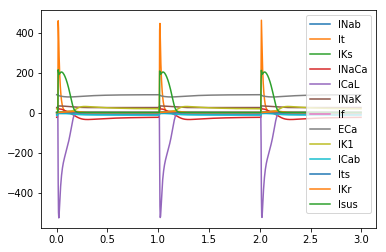

In [13]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [14]:
for aFullPN in FullPNs_for_plot:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Membrane:ECa:Value
[[0.00000000e+00 8.92903691e+01]
 [3.00999999e-03 8.93045965e+01]
 [6.00999998e-03 8.93091253e+01]
 ...
 [2.99100999e+00 8.92770815e+01]
 [2.99400999e+00 8.92817415e+01]
 [2.99700999e+00 8.92863668e+01]]
Variable:/Cell/Membrane:ICaL:Value
[[ 0.         -0.01583854]
 [ 0.00301    -0.01582485]
 [ 0.00601    -0.01581052]
 ...
 [ 2.99100999 -0.01587634]
 [ 2.99400999 -0.01586318]
 [ 2.99700999 -0.01585018]]
Variable:/Cell/Membrane:ICab:Value
[[ 0.00000000e+00 -1.31072130e+01]
 [ 3.00999999e-03 -1.31087827e+01]
 [ 6.00999998e-03 -1.31095731e+01]
 ...
 [ 2.99100999e+00 -1.31050404e+01]
 [ 2.99400999e+00 -1.31057994e+01]
 [ 2.99700999e+00 -1.31065511e+01]]
Variable:/Cell/Membrane:IK1:Value
[[0.00000000e+00 1.90289816e+01]
 [3.00999999e-03 1.90185189e+01]
 [6.00999998e-03 1.90084276e+01]
 ...
 [2.99100999e+00 1.90561041e+01]
 [2.99400999e+00 1.90470051e+01]
 [2.99700999e+00 1.90380068e+01]]
Variable:/Cell/Membrane:IKr:Value
[[0.00000000e+00 8.39059497e-05]
 [3

In [15]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Membrane:V:Value',
]

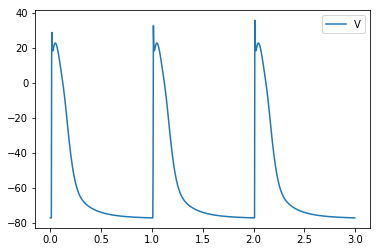

In [16]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [17]:
for aFullPN in FullPNs_for_plot:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Membrane:V:Value
[[ 0.00000000e+00 -7.72963928e+01]
 [ 3.00999999e-03 -7.73021149e+01]
 [ 6.00999998e-03 -7.73076317e+01]
 ...
 [ 2.99100999e+00 -7.72820673e+01]
 [ 2.99400999e+00 -7.72870536e+01]
 [ 2.99700999e+00 -7.72919828e+01]]


In [18]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Cytosol/ss:Ca:MolarConc',
]

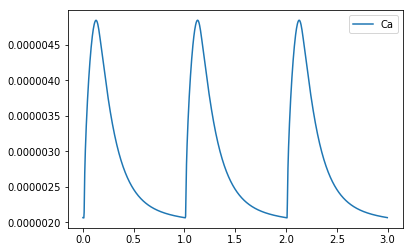

In [19]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [20]:
volume_dict = dict(
    ss     = Stub_dict['Variable:/Cell/Cytosol/ss:SIZE']['Value'],
    bulk_1 = Stub_dict['Variable:/Cell/Cytosol/bulk_1:SIZE']['Value'],
    bulk_2 = Stub_dict['Variable:/Cell/Cytosol/bulk_2:SIZE']['Value'],
    bulk_3 = Stub_dict['Variable:/Cell/Cytosol/bulk_3:SIZE']['Value'],
    bulk_4 = Stub_dict['Variable:/Cell/Cytosol/bulk_4:SIZE']['Value'],
    SR_1   = Stub_dict['Variable:/Cell/SR_1:SIZE']['Value'],
    SR_2   = Stub_dict['Variable:/Cell/SR_2:SIZE']['Value'],
    SR_3   = Stub_dict['Variable:/Cell/SR_3:SIZE']['Value'],
    SR_4   = Stub_dict['Variable:/Cell/SR_4:SIZE']['Value'],
)

## 細胞質のCa

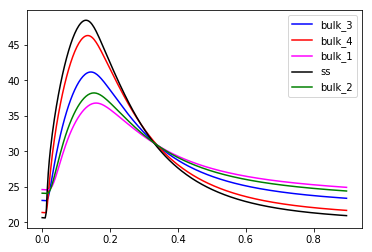

In [21]:
'''
Variable:/Cell/SR_1:Ca
Variable:/Cell/SR_1:Ca_buffer
Variable:/Cell/SR_1:SIZE

Variable:/Cell/SR_2:Ca
Variable:/Cell/SR_2:Ca_buffer
Variable:/Cell/SR_2:SIZE

Variable:/Cell/SR_3:Ca
Variable:/Cell/SR_3:Ca_buffer
Variable:/Cell/SR_3:SIZE

Variable:/Cell/SR_4:Ca
Variable:/Cell/SR_4:Ca_buffer
Variable:/Cell/SR_4:SIZE

Variable:/Cell/Cytosol/bulk:Na_i
Variable:/Cell/Cytosol/bulk:SIZE
'''

FullPNs_for_plot = [ 
    'Variable:/Cell/Cytosol/ss:Ca:MolarConc',
    'Variable:/Cell/Cytosol/bulk_1:Ca:MolarConc',
    'Variable:/Cell/Cytosol/bulk_2:Ca:MolarConc',
    'Variable:/Cell/Cytosol/bulk_3:Ca:MolarConc',
    'Variable:/Cell/Cytosol/bulk_4:Ca:MolarConc',
]


plot_colors = dict(
    ss     = 'black',
    bulk_1 = 'magenta',
    bulk_2 = 'green',
    bulk_3 = 'blue',
    bulk_4 = 'red',
)

plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        name = FullPN.split(':')[ 1 ].split('/')[-1]
        plt.plot( d[ :300, 0 ], d[ :300, 1 ] * 10e6, label = name, color = plot_colors[ name ] )

plt.legend( loc = 'upper right' )

<img width="380" align="left" src="./ref/21298076-Fig3A.png">

#### Figure 3. Ca<sup>2+</sup> dynamics of the model.
(A) The Ca2+ transients at different parts of the cytosol differ from the average cytosolic Ca2+ signal. The x-coordinates of the compartments are as follows: subspace 0.01 µm, bulk1 = 0.8325 µm, bulk2 = 2.4575 µm, bulk3 = 4.0825 µm, and bulk4 = 5.7075 µm; SL = 0 µm. (B) Spatiotemporal representation of [Ca2+] demonstrates clearly the divergence of both the amplitude and delay of Ca2+ release in different parts of the cytosol. (C) and (D) The model reproduces the experimentally found biphasic increment during the upstroke of the global Ca2+ transient [7]. (E) Release rates of the two phases of the Ca2+ transient in experiments by Hatem et al. [7] and simulations. The two values of release rates (arrows in (C) indicate the stages of release) were obtained with a linear fit to normalized Ca2+ transients.
https://doi.org/10.1371/journal.pcbi.1001067.g003

## $J_{rel}$

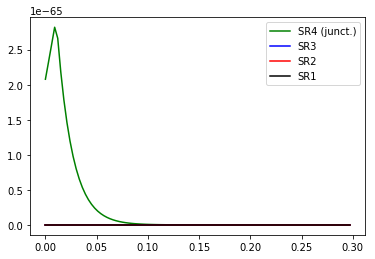

In [22]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Cytosol/ss:Jrel:Value',
    'Variable:/Cell/Cytosol/bulk_3:Jrel:Value',
    'Variable:/Cell/Cytosol/bulk_2:Jrel:Value',
    'Variable:/Cell/Cytosol/bulk_1:Jrel:Value',
]

plot_colors = dict(
    ss     = 'green',
    bulk_1 = 'black',
    bulk_2 = 'red',
    bulk_3 = 'blue',
)

name_table = dict(
    ss     = 'SR4 (junct.)',
    bulk_1 = 'SR1',
    bulk_2 = 'SR2',
    bulk_3 = 'SR3',
)

plt.figure()
for FullPN in FullPNs_for_plot:
#for FullPN, d in Data_dict.items():
    d = Data_dict[ FullPN ]
    name = FullPN.split(':')[ 1 ].split('/')[-1]
    plt.plot( d[ :100, 0 ], d[ :100, 1 ] * 1000., 
        label = name_table[ name ], color = plot_colors[ name ] )

plt.legend( loc = 'upper right' )

<img width="400" align="left" src="./ref/21298076-Fig4C.png">

#### Figure 4. SR Ca<sup>2+</sup> dynamics of the model.
(A) and (B) Inhibition of the SR Ca2+ release with ryanodine greatly reduces the Ca2+ transient amplitude in both experiments [7] and simulations. Detailed analysis indicates that the SR Ca2+ release generates 77% of the Ca2+ transient amplitude, which is in line with the experimental findings 79±6% of Hatem et al. [7]. (C) and (D) Most of the Ca2+ release is generated from the junctional compartment. (E) and (F) During the uptake of Ca2+ from the cytosol to the SR, the SERCA buffers the Ca2+ and generates a delay in the fluxes between the cytosol to SERCA and SERCA to SR. At the end of the diastolic phase, there is some diffusion of Ca2+ in the SR, which balances the concentration differences in different parts of the SR.
https://doi.org/10.1371/journal.pcbi.1001067.g004

## SR[Ca<sup>2+</sup>]

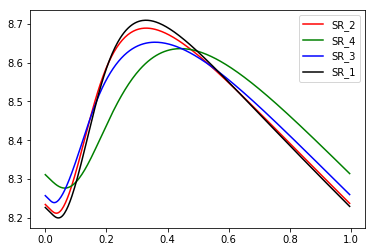

In [23]:
FullPNs_for_plot = [ 
    'Variable:/Cell/SR_4:Ca:MolarConc',
    'Variable:/Cell/SR_3:Ca:MolarConc',
    'Variable:/Cell/SR_2:Ca:MolarConc',
    'Variable:/Cell/SR_1:Ca:MolarConc',
]

plot_colors = dict(
    SR_1 = 'black',
    SR_2 = 'red',
    SR_3 = 'blue',
    SR_4 = 'green',
)

plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        name = FullPN.split(':')[ 1 ].split('/')[-1]
        plt.plot( d[ :333, 0 ], d[ :333, 1 ] * 1000., label = name, color = plot_colors[ name ] )

plt.legend( loc = 'upper right' )

<img width="400" align="left" src="./ref/21298076-Fig4D.png">

#### Figure 4. SR Ca<sup>2+</sup> dynamics of the model.
(A) and (B) Inhibition of the SR Ca2+ release with ryanodine greatly reduces the Ca2+ transient amplitude in both experiments [7] and simulations. Detailed analysis indicates that the SR Ca2+ release generates 77% of the Ca2+ transient amplitude, which is in line with the experimental findings 79±6% of Hatem et al. [7]. (C) and (D) Most of the Ca2+ release is generated from the junctional compartment. (E) and (F) During the uptake of Ca2+ from the cytosol to the SR, the SERCA buffers the Ca2+ and generates a delay in the fluxes between the cytosol to SERCA and SERCA to SR. At the end of the diastolic phase, there is some diffusion of Ca2+ in the SR, which balances the concentration differences in different parts of the SR.
https://doi.org/10.1371/journal.pcbi.1001067.g004

## $J_{SERCA}$

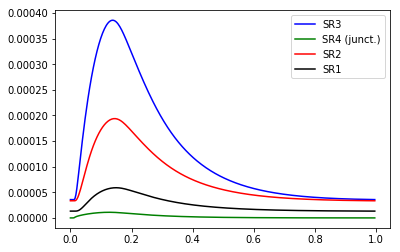

In [24]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Cytosol/ss:J_bulkSERCA:Value',
    'Variable:/Cell/Cytosol/bulk_3:J_bulkSERCA:Value',
    'Variable:/Cell/Cytosol/bulk_2:J_bulkSERCA:Value',
    'Variable:/Cell/Cytosol/bulk_1:J_bulkSERCA:Value',
]

plot_colors = dict(
    ss     = 'green',
    bulk_1 = 'black',
    bulk_2 = 'red',
    bulk_3 = 'blue',
)

name_table = dict(
    ss     = 'SR4 (junct.)',
    bulk_1 = 'SR1',
    bulk_2 = 'SR2',
    bulk_3 = 'SR3',
)

plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        name = FullPN.split(':')[ 1 ].split('/')[-1]
        plt.plot( d[ :333, 0 ], d[ :333, 1 ], label = name_table[ name ], color = plot_colors[ name ] )

plt.legend( loc = 'upper right' )

<img width="400" align="left" src="./ref/21298076-Fig4E.png">

#### Figure 4. SR Ca<sup>2+</sup> dynamics of the model.
(A) and (B) Inhibition of the SR Ca2+ release with ryanodine greatly reduces the Ca2+ transient amplitude in both experiments [7] and simulations. Detailed analysis indicates that the SR Ca2+ release generates 77% of the Ca2+ transient amplitude, which is in line with the experimental findings 79±6% of Hatem et al. [7]. (C) and (D) Most of the Ca2+ release is generated from the junctional compartment. (E) and (F) During the uptake of Ca2+ from the cytosol to the SR, the SERCA buffers the Ca2+ and generates a delay in the fluxes between the cytosol to SERCA and SERCA to SR. At the end of the diastolic phase, there is some diffusion of Ca2+ in the SR, which balances the concentration differences in different parts of the SR.
https://doi.org/10.1371/journal.pcbi.1001067.g004

## $J_{SERCA,SR}$

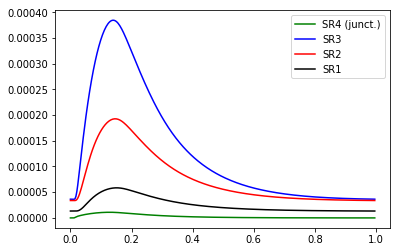

In [25]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Cytosol/ss:J_SERCASR:Value',
    'Variable:/Cell/Cytosol/bulk_3:J_SERCASR:Value',
    'Variable:/Cell/Cytosol/bulk_2:J_SERCASR:Value',
    'Variable:/Cell/Cytosol/bulk_1:J_SERCASR:Value',
]

plot_colors = dict(
    ss     = 'green',
    bulk_1 = 'black',
    bulk_2 = 'red',
    bulk_3 = 'blue',
)

name_table = dict(
    ss     = 'SR4 (junct.)',
    bulk_1 = 'SR1',
    bulk_2 = 'SR2',
    bulk_3 = 'SR3',
)

plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        name = FullPN.split(':')[ 1 ].split('/')[-1]
        plt.plot( d[ :333, 0 ], d[ :333, 1 ], label = name_table[ name ], color = plot_colors[ name ] )

plt.legend( loc = 'upper right' )

<img width="400" align="left" src="./ref/21298076-Fig4F.png">

#### Figure 4. SR Ca<sup>2+</sup> dynamics of the model.
(A) and (B) Inhibition of the SR Ca2+ release with ryanodine greatly reduces the Ca2+ transient amplitude in both experiments [7] and simulations. Detailed analysis indicates that the SR Ca2+ release generates 77% of the Ca2+ transient amplitude, which is in line with the experimental findings 79±6% of Hatem et al. [7]. (C) and (D) Most of the Ca2+ release is generated from the junctional compartment. (E) and (F) During the uptake of Ca2+ from the cytosol to the SR, the SERCA buffers the Ca2+ and generates a delay in the fluxes between the cytosol to SERCA and SERCA to SR. At the end of the diastolic phase, there is some diffusion of Ca2+ in the SR, which balances the concentration differences in different parts of the SR.
https://doi.org/10.1371/journal.pcbi.1001067.g004

In [26]:
for aFullPN in FullPNs_for_plot:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Cytosol/ss:J_SERCASR:Value
[[ 0.00000000e+00 -1.67985765e-07]
 [ 3.00999999e-03 -1.72662180e-07]
 [ 6.00999998e-03 -1.73745897e-07]
 ...
 [ 2.99100999e+00 -1.66604185e-07]
 [ 2.99400999e+00 -1.67108472e-07]
 [ 2.99700999e+00 -1.67593872e-07]]
Variable:/Cell/Cytosol/bulk_3:J_SERCASR:Value
[[0.00000000e+00 3.62507444e-05]
 [3.00999999e-03 3.62173033e-05]
 [6.00999998e-03 3.61716211e-05]
 ...
 [2.99100999e+00 3.63289358e-05]
 [2.99400999e+00 3.63009962e-05]
 [2.99700999e+00 3.62738344e-05]]
Variable:/Cell/Cytosol/bulk_2:J_SERCASR:Value
[[0.00000000e+00 3.36727733e-05]
 [3.00999999e-03 3.36561287e-05]
 [6.00999998e-03 3.36381735e-05]
 ...
 [2.99100999e+00 3.37200483e-05]
 [2.99400999e+00 3.37032732e-05]
 [2.99700999e+00 3.36868893e-05]]
Variable:/Cell/Cytosol/bulk_1:J_SERCASR:Value
[[0.00000000e+00 1.32240836e-05]
 [3.00999999e-03 1.32186209e-05]
 [6.00999998e-03 1.32133030e-05]
 ...
 [2.99100999e+00 1.32398513e-05]
 [2.99400999e+00 1.32342751e-05]
 [2.99700999e+00 1.3228814

In [27]:
FullPNs_INa = [ 
    'Variable:/Cell/Membrane:INa:Value',
    'Variable:/Cell/Membrane:INam:Value',
    'Variable:/Cell/Membrane:INah1:Value',
    'Variable:/Cell/Membrane:INah2:Value',
    'Variable:/Cell/Membrane:INamtau:Value',
    'Variable:/Cell/Membrane:INah1tau:Value',
    'Variable:/Cell/Membrane:INah2tau:Value',
    'Variable:/Cell/Membrane:INaminf:Value',
    'Variable:/Cell/Membrane:INahinf:Value',
]

In [28]:
for aFullPN in FullPNs_INa:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Membrane:INa:Value
[[ 0.00000000e+00 -6.96543262e-04]
 [ 3.00999999e-03 -6.95198331e-04]
 [ 6.00999998e-03 -6.93903049e-04]
 ...
 [ 2.99100999e+00 -6.99899157e-04]
 [ 2.99400999e+00 -6.98728919e-04]
 [ 2.99700999e+00 -6.97573866e-04]]
Variable:/Cell/Membrane:INam:Value
[[0.00000000e+00 2.21206988e-03]
 [3.00999999e-03 2.21053456e-03]
 [6.00999998e-03 2.20905233e-03]
 ...
 [2.99100999e+00 2.21592506e-03]
 [2.99400999e+00 2.21458241e-03]
 [2.99700999e+00 2.21325596e-03]]
Variable:/Cell/Membrane:INah1:Value
[[0.         0.92914766]
 [0.00301    0.92921645]
 [0.00601    0.92928506]
 ...
 [2.99100999 0.92894405]
 [2.99400999 0.92901474]
 [2.99700999 0.92908453]]
Variable:/Cell/Membrane:INah2:Value
[[0.         0.92174032]
 [0.00301    0.92193697]
 [0.00601    0.9221299 ]
 ...
 [2.99100999 0.92113878]
 [2.99400999 0.92134492]
 [2.99700999 0.92154756]]
Variable:/Cell/Membrane:INamtau:Value
[[0.00000000e+00 2.56683831e-05]
 [3.00999999e-03 2.56671928e-05]
 [6.00999998e-03 2.5666